<a href="https://colab.research.google.com/github/tramplingh/Marvel/blob/main/FakeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!pip install faker -q

In [123]:
from faker import Faker
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
!pip install drawdata -q

Depiction of what i think the plot of loan_approved would look like
---
x-axis - credit_score, y-axis - income

In [149]:
from drawdata import draw_scatter, ScatterWidget
widget = ScatterWidget()
widget

ScatterWidget()

In [151]:
data = widget.data_as_pandas
data.head()

,x,y,color,label,batch
0,105.403803,432.848105,#2ca02c,c,0
1,52.562808,428.894485,#2ca02c,c,0
2,93.120586,380.372070,#2ca02c,c,0
3,119.225182,400.339543,#2ca02c,c,0
4,127.695447,462.357535,#2ca02c,c,0


In [155]:
data['label'].unique()

array(['c', 'd'], dtype=object)

## Generate Fake Data

In [132]:
Faker.seed(42)
random.seed(42)
fake = Faker()

name, city, income, credit_score, loan_amount, years_employed

In [133]:
name = []
city = []
income = []
credit_score = []
loan_amount = []
years_employed = []

In [134]:
for i in range(2000):
    name.append(fake.unique.name())
    city.append(fake.city())
    income.append(random.randint(30000, 150000))
    credit_score.append(fake.random.randint(300,850))
    loan_amount.append(fake.random.randint(1000,50000))
    years_employed.append(fake.random.randint(0,40))


In [135]:
df = pd.DataFrame({'name':name, 'city':city, 'income':income, 'credit_score':credit_score, 'loan_amount':loan_amount, 'years_employed':years_employed})

In [136]:
df.head()

,name,city,income,credit_score,loan_amount,years_employed
0,Allison Hill,East Jill,113810,389,39698,27
1,Brandon Hall,New Jamesside,44592,729,15446,28
2,Rhonda Smith,Lake Roberto,33278,584,11189,13
3,Gabrielle Davis,West Melanieview,127196,344,48823,29
4,Valerie Gray,Mariastad,66048,496,47174,4


In [137]:
df.shape

(2000, 6)

In [138]:
duplicate_names_count = df['name'].duplicated().sum()
print(f"Number of duplicate names: {duplicate_names_count}")

Number of duplicate names: 0


In [139]:
df['loan_approved'] = None

In [140]:
df.head()

,name,city,income,credit_score,loan_amount,years_employed,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,None
1,Brandon Hall,New Jamesside,44592,729,15446,28,None
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,None
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,None
4,Valerie Gray,Mariastad,66048,496,47174,4,None


### Making a point system to decide if the loan should be approved or no.
---
putting it in a list to make it more concise and decrease conditional statements

In [156]:
#Point System
cs_points = [(800,40), (740,35), (670,25), (580,15)]
income_points = [(100000,30), (75000,25), (50000,20), (30000,10)]
lti_points = [(10,15), (25,10), (40,5)]    #loan-to-income ratio. lti_ratio = (loan_amount/income)*100
year_points = [(10,15), (5,10), (2,5)]
min_point = 60

In [157]:
for i in df.itertuples():
  points = 0
  for threshold, pnt in cs_points:
    if i.credit_score >= threshold:
      points += pnt
      break
  for threshold, pnt in income_points:
    if i.income >= threshold:
      points += pnt
      break
  for threshold, pnt in lti_points:
    lti_ratio = (i.loan_amount/i.income)*100
    if lti_ratio < threshold:
      points += pnt
      break
  for threshold, pnt in year_points:
    if i.years_employed >= threshold:
      points += pnt
      break
  if points < min_point:
    df.loc[i.Index, 'loan_approved'] = False
    df.loc[i.Index, 'points'] = points
  else:
    df.loc[i.Index, 'loan_approved'] = True
    df.loc[i.Index, 'points'] = points

In [158]:
df.head()

,name,city,income,credit_score,loan_amount,years_employed,loan_approved,points
0,Allison Hill,East Jill,113810,389,39698,27,False,50.0
1,Brandon Hall,New Jamesside,44592,729,15446,28,False,55.0
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,False,45.0
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,False,50.0
4,Valerie Gray,Mariastad,66048,496,47174,4,False,25.0


<Axes: xlabel='loan_approved', ylabel='count'>

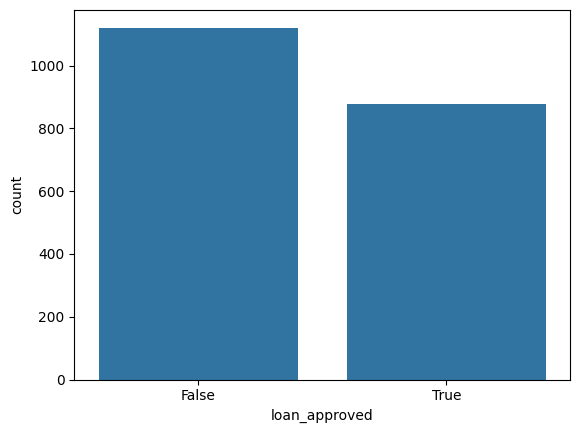

In [159]:
sns.countplot(data=df, x='loan_approved')

<Axes: xlabel='income', ylabel='credit_score'>

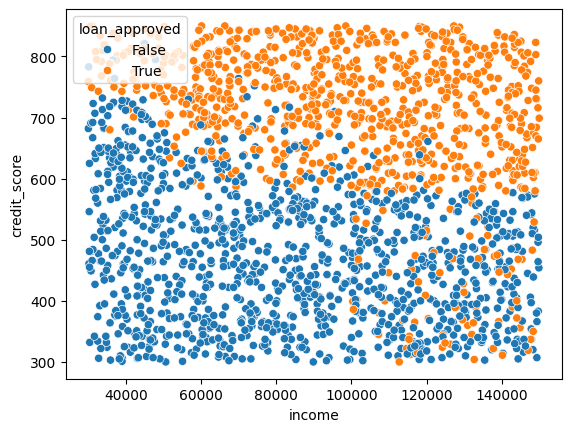

In [160]:
sns.scatterplot(data=df, x='income', y='credit_score', hue='loan_approved')
#